### Define State, functions

In [7]:
from typing import TypedDict

"""
    Objective: A simple graph flow to analyse your investment portfolio.
"""

class PortfolioState(TypedDict):
    invested_amount_usd: float
    total_usd: float # amount after 8% return
    total_inr: float # amount after conversion to inr

def calculate_total(state: PortfolioState) -> PortfolioState:
    state["total_usd"] = state["invested_amount_usd"] * 1.08  # amount after 8% return
    return state

def convert_to_inr(state: PortfolioState) -> PortfolioState:
    state["total_inr"] = state["total_usd"] * 82.0 # amount after conversion to inr
    return state

### Make your graph

In [8]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)

# Adding nodes to the graph
builder.add_node("calculates_total_node", calculate_total) # Syntax: "<name of node>", <function that the node will execute>
builder.add_node("convert_to_inr_node", convert_to_inr)

# Adding edges to the graph
builder.add_edge(START, "calculates_total_node") # Syntax: <from node>, <to node>; START and END are special nodes. More specifically, the START Node is a special node that represents the node that sends user input to the graph.
builder.add_edge("calculates_total_node", "convert_to_inr_node")
builder.add_edge("convert_to_inr_node", END) # The END Node is a special node that represents the final output of the graph.

graph = builder.compile()

### View the graph, right now, our graph is simple and linear

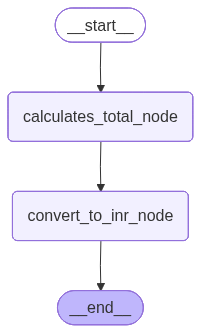

In [9]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png())) # visualize the graph

In [10]:
graph.invoke({"invested_amount_usd": 1000.0}) # invoke the graph with initial state

{'invested_amount_usd': 1000.0, 'total_usd': 1080.0, 'total_inr': 88560.0}